![Gráfico de regresión lineal](../Imagenes/regrLin.png)

El ejercicio consiste en predecir el coste de un incidente de seguridad lineal aplicada a un caso sencillo relacionado
con Ciberseguridad

Enunciado del ejercicio
El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria

1. Generación del conjunto de datos

In [32]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [70]:
import numpy as np
X = 2 * np.random.rand(200, 1)
Y = 4 + 3 * X + np.random.randn(200, 1)

print("La longitud del conjunto de datos es:", len(Y))
Y

La longitud del conjunto de datos es: 200


array([[ 6.4481835 ],
       [ 6.80323912],
       [ 5.03987688],
       [ 5.72268357],
       [ 5.61920841],
       [ 7.53459665],
       [ 8.84022943],
       [ 5.65415839],
       [ 5.82837838],
       [ 6.19469206],
       [ 6.98479114],
       [ 7.67827049],
       [ 6.05411115],
       [ 9.47116344],
       [ 7.13230218],
       [10.32220961],
       [ 8.30348674],
       [10.25528396],
       [ 6.66529198],
       [ 5.75729962],
       [ 9.74402598],
       [ 4.92933285],
       [ 5.1506123 ],
       [ 9.46535881],
       [ 9.23109702],
       [ 3.98570209],
       [ 8.80165615],
       [ 8.57402202],
       [ 9.9208665 ],
       [ 5.62966859],
       [ 6.79417296],
       [ 5.77082885],
       [ 6.41015767],
       [ 5.67291042],
       [ 5.5824386 ],
       [ 5.42348635],
       [ 5.67945958],
       [ 7.16103425],
       [ 5.70366707],
       [ 8.55832298],
       [ 7.34348295],
       [ 7.22847163],
       [ 8.7194161 ],
       [ 7.23298165],
       [ 5.59179263],
       [ 7

2. Visualización de los datos

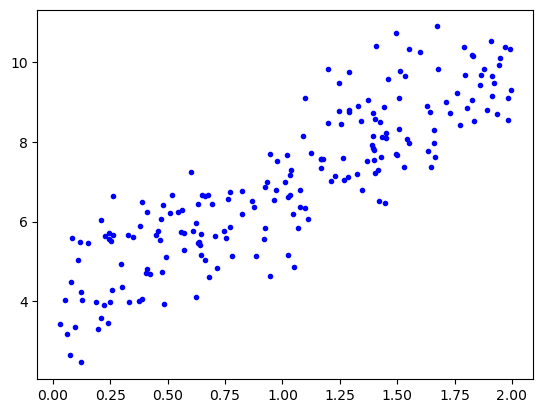

In [72]:
import matplotlib.pyplot as plt
plt.plot(X,Y, "b.")
plt.show()

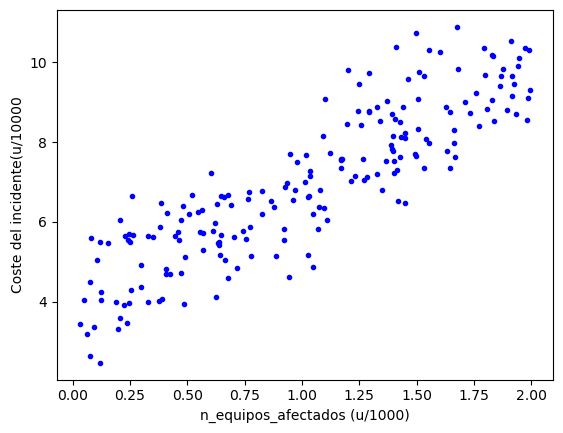

In [74]:
plt.plot(X,Y, "b.")
plt.xlabel("n_equipos_afectados (u/1000)")
plt.ylabel("Coste del incidente(u/10000")
plt.show()

3. Modificación del conjunto de datos
4. Data es una diccionario clave/valor donde X,flatten() y Y.flatten() se transforman en arreglo de datos unidimencionales

In [76]:
import pandas as pd
data = {'n_equipos_afectados' : X.flatten(), 'coste': Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.631132,6.448184
1,1.077477,6.803239
2,0.662994,5.039877
3,0.570171,5.722684
4,0.349158,5.619208
5,1.400588,7.534597
6,1.804315,8.840229
7,0.328882,5.654158
8,0.923237,5.828378
9,0.824505,6.194692


In [78]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)


,n_equipos_afectados,coste
0,631,64481
1,1077,68032
2,662,50398
3,570,57226
4,349,56192
5,1400,75345
6,1804,88402
7,328,56541
8,923,58283
9,824,61946


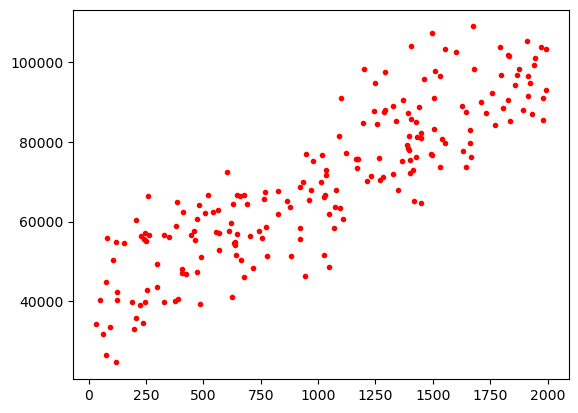

In [80]:
plt.plot(df['n_equipos_afectados'], df['coste'], "r.")
plt.show()

4. Construccion del modelo

In [48]:
from sklearn.linear_model import LinearRegression

In [82]:
#Construccion del modelo
Lin_reg = LinearRegression()   #Se crea instancia del modelo
Lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)


LinearRegression()

In [52]:
Lin_reg.intercept_

40054.903152039566

In [54]:
#Parametro theta1
Lin_reg.coef_

array([29.8260911])

In [84]:
x_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_predict = Lin_reg.predict(x_min_max)
y_train_predict 


array([40266.31612443, 98808.26969472])

#Representación grafica de la funcion de hipótesis generada 

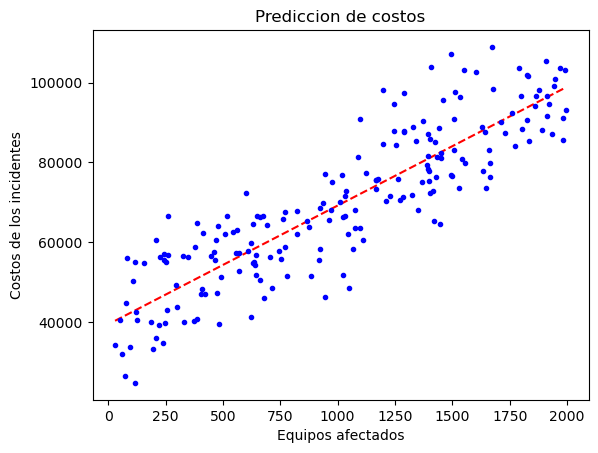

In [90]:
plt.plot(x_min_max, y_train_predict, "r--")
plt.plot(df["n_equipos_afectados"], df["coste"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costos de los incidentes")
plt.title("Prediccion de costos")
plt.show()

5. Predicciones de nuevos ejemplos

In [94]:
x_new = np.array([[350]])
coste = Lin_reg.predict(x_new)
print("El coste del accidentes es ", coste)

El coste del accidentes es  [49799.86581526]


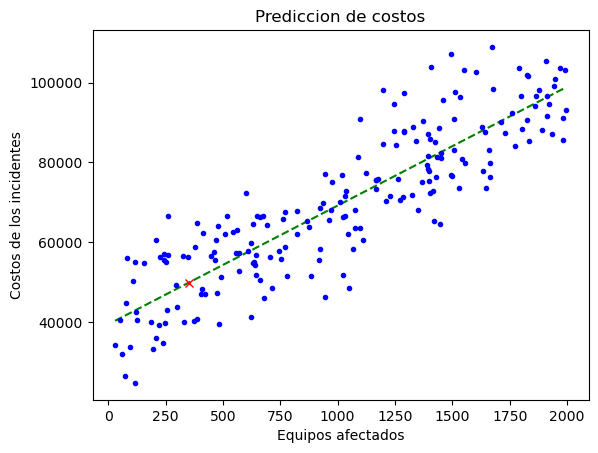

In [96]:
plt.plot(x_min_max, y_train_predict, "g--")
plt.plot(df["n_equipos_afectados"], df["coste"], "b.")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Costos de los incidentes")
plt.title("Prediccion de costos")
plt.show()